# Time series classification
Time series classification (TSC)

Using data from timeseriesclassification.com
TODO add reference to Dau et al. 2018

The SonyAIBORobotSurface dataset was donated to the TSC website by Manuela Veloso and Douglas Vail of Carnegie Mellon University. Their paper on robot surface detection is
https://www.cs.cmu.edu/~mmv/papers/04iav-doug.pdf
TODO - get full reference.


# Load Python packages
Import the Python packages that we will need.

In [89]:
from pathlib import Path
import time

import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [58]:
sns.set_style('whitegrid')

# Load the data
TODO introduce the dataset and what it is used for.

The dataset has been split into two, balanced, datasets. One for model development and one for our final test to evaluate the finished model.

In [59]:
data_dir = '../../data'
data_name = 'SonyAIBORobotSurface1_IoC'
data_filename = data_dir+'/'+data_name+'/'+data_name+'_DEV.txt'
print(data_filename)

../../data/SonyAIBORobotSurface1_IoC/SonyAIBORobotSurface1_IoC_DEV.txt


In [60]:
robot_data = np.loadtxt(Path(data_filename))
print('The shape of robot_data is', robot_data.shape)
print('robot_data:', robot_data)

The shape of robot_data is (444, 71)
robot_data: [[ 2.          1.420368    2.36012    ...  0.2926656   0.2926656
  -0.08323518]
 [ 2.          0.5816091   1.204762   ...  0.166174   -0.04154351
  -0.04154351]
 [ 2.          1.348139    1.566588   ...  0.4743452   0.6927937
   0.6927937 ]
 ...
 [ 2.          0.5610896   1.201464   ... -0.0792844   0.1341736
   0.1341736 ]
 [ 2.         -0.4283717   0.02596192 ...  0.2531288   0.02596192
  -0.2012049 ]
 [ 1.          0.7488859   0.2612393  ...  0.2612393   0.2612393
   0.2612393 ]]


In [61]:
y_dev = robot_data[:,0]
x_dev = robot_data[:,1:]
print('The shape of x_dev is', x_dev.shape)
print('The shape of y_dev is', y_dev.shape)

The shape of x_dev is (444, 70)
The shape of y_dev is (444,)


Number of samples of class 1 222
Number of samples of class 2 222


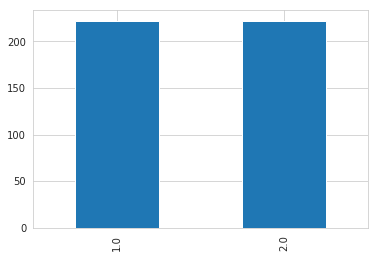

In [62]:
print('Number of samples of class 1', (y_dev == 1.0).sum())
print('Number of samples of class 2', (y_dev == 2.0).sum())
y_dev_df = pd.DataFrame(y_dev)
y_dev_df[0].value_counts().plot(kind='bar')

## Plot the data

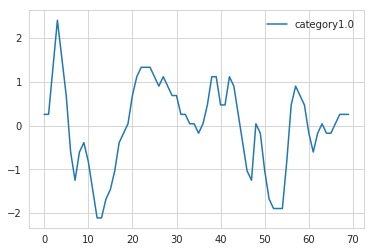

In [63]:
sample_number = 3 ### CHANGE PARAMETER HERE ###
plt.plot(x_dev[sample_number], label='category'+str(y_dev[sample_number]))
plt.legend(loc='upper right', frameon=False)

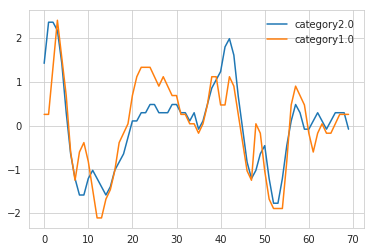

In [64]:
sample_a = 0 ### CHANGE PARAMETER HERE ###
sample_b = 3 ### CHANGE PARAMETER HERE ###
plt.plot(x_dev[sample_a], label='category'+str(y_dev[sample_a]))
plt.plot(x_dev[sample_b], label='category'+str(y_dev[sample_b]))
plt.legend(loc='upper right', frameon=False)

# Split the development dataset into training and test datasets

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_dev, y_dev, test_size=100, random_state=21, stratify=y_dev)
print('The shape of train_data is', train_data.shape)
print('The shape of test_data is', test_data.shape)
print('Training data:')
print('Number of samples of class 1', (train_data[:,0] == 1.0).sum())
print('Number of samples of class 2', (train_data[:,0] == 2.0).sum())
print('Test data:')
print('Number of samples of class 1', (test_data[:,0] == 1.0).sum())
print('Number of samples of class 2', (test_data[:,0] == 2.0).sum())

The shape of train_data is (444, 71)
The shape of test_data is (100, 71)
Training data:
Number of samples of class 1 222
Number of samples of class 2 222
Test data:
Number of samples of class 1 50
Number of samples of class 2 50


# Pre-process the data

In [66]:
y_train = (y_train - y_train.min())/(y_train.max()-y_train.min())
y_test = (y_test - y_test.min())/(y_test.max()-y_test.min())

x_train_mean = x_train.mean()
x_train_std = x_train.std()
x_train = (x_train - x_train_mean)/(x_train_std) 
x_test = (x_test - x_train_mean)/(x_train_std)

print('x_train_mean', x_train_mean)
print('x_train_std', x_train_std)

x_train_mean -1.0489617942066487e-09
x_train_std 0.9928314512415922


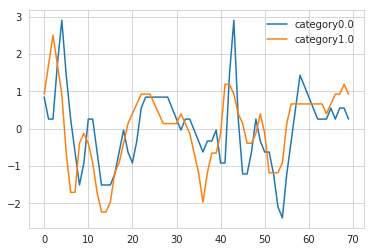

In [67]:
sample_a = 0 ### CHANGE PARAMETER HERE ###
sample_b = 4 ### CHANGE PARAMETER HERE ###
plt.plot(x_train[sample_a], label='category'+str(y_train[sample_a]))
plt.plot(x_train[sample_b], label='category'+str(y_train[sample_b]))
plt.legend(loc='upper right', frameon=False)

# MLP 1
Create an multilayer perceptron (MLP). This first MLP is small.

In [68]:
input_shape = x_train.shape[1:]

In [69]:
n0 = 16
x = Input(shape=(input_shape), name='MLP1InputLayer')
y = Dense(n0, activation='relu', name='Dense010')(x)
# Output layer
out = Dense(1, activation='sigmoid', name='OutputLayer')(y)

# Build model
model_mlp1 = Model(x, out)
print(model_mlp1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
MLP1InputLayer (InputLayer)  (None, 70)                0         
_________________________________________________________________
Dense010 (Dense)             (None, 16)                1136      
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 17        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________
None


## Understanding the number of parameters
TODO - exercise around the calculation that arrives at the number of parameters in each layer.

In [70]:
print(70*16+16)
print(16+1)

1136
17


## Select an optimizer and compile the model

In [71]:
optimizer = keras.optimizers.Adam()
model_mlp1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# TODO - can we access TensorBoard on colab? If so, add tensorboard callback

## Train MLP 1

In [72]:
batch_size = 5
epochs = 50

In [85]:
start = time.time()
hist = model_mlp1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=1)
end = time.time()
log = pd.DataFrame(hist.history) 
print('Training complete in', round(end-start), 'seconds')

Train on 344 samples, validate on 100 samples
Epoch 1/50
344/344 [==============================] - 1s 2ms/sample - loss: 0.0333 - acc: 0.9913 - val_loss: 0.0814 - val_acc: 0.9800
Epoch 2/50
344/344 [==============================] - 1s 2ms/sample - loss: 0.0451 - acc: 0.9855 - val_loss: 0.0926 - val_acc: 0.9800
Epoch 3/50
344/344 [==============================] - 1s 2ms/sample - loss: 0.0658 - acc: 0.9884 - val_loss: 0.0999 - val_acc: 0.9800
Epoch 4/50
344/344 [==============================] - 1s 2ms/sample - loss: 0.0469 - acc: 0.9797 - val_loss: 0.1118 - val_acc: 0.9700
Epoch 5/50
344/344 [==============================] - 1s 2ms/sample - loss: 0.0479 - acc: 0.9826 - val_loss: 0.1387 - val_acc: 0.9700
Epoch 6/50
344/344 [==============================] - 1s 2ms/sample - loss: 0.0373 - acc: 0.9855 - val_loss: 0.1311 - val_acc: 0.9800
Epoch 7/50
344/344 [==============================] - 1s 2ms/sample - loss: 0.0170 - acc: 1.0000 - val_loss: 0.1346 - val_acc: 0.9800
Epoch 8/50
344/3

In [74]:
print('The first five rows in log are')
log.head()

The first five rows in log are


,acc,loss,val_acc,val_loss
0,0.779070,0.532606,0.87,0.436896
1,0.944767,0.310876,0.94,0.287849
2,0.959302,0.202826,0.94,0.216322
3,0.970930,0.146848,0.91,0.195813
4,0.968023,0.117414,0.95,0.160784


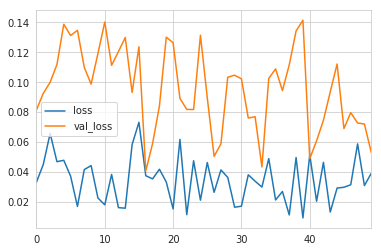

In [86]:
log[['loss', 'val_loss']].plot()
# TODO add axes labels, etc

100/100 [==============================] - 0s 425us/sample - loss: 0.0531 - acc: 0.9900
Validation accuracy is 0.97


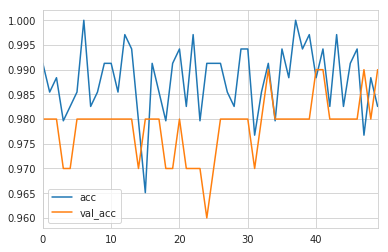

In [87]:
log[['acc', 'val_acc']].plot()

# Make predictions using MLP 1
Classify the data using MLP 1

In [77]:
result = model_mlp1.evaluate(x_test, y_test, batch_size=batch_size)
print('Validation accuracy is', result[1])

100/100 [==============================] - 0s 300us/sample - loss: 0.0563 - acc: 0.9700
Validation accuracy is 0.97


In [78]:
y_probability = model_mlp1.predict_on_batch(x_test)
y_predicted_class = np.round(y_probability).flatten()

In [79]:
sample = 3
print('The probability that sample', sample, 'belongs to class 1 is', y_probability[sample][0])
print('The model classifies sample', sample, 'as class', y_predicted_class[sample])
print('The true class of sample', sample, 'is class', y_test[sample])

Probability that sample 3 belongs to class 1 is 0.46859294
The model classifies sample 3 as class 0.0
The true class of sample 3 is class 1.0


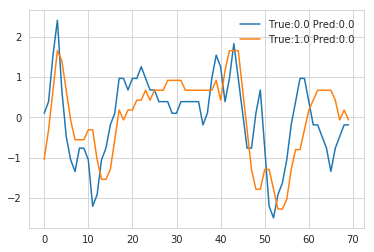

In [80]:
sample_a = 0 ### CHANGE PARAMETER HERE ###
sample_b = 3 ### CHANGE PARAMETER HERE ###
plt.plot(x_test[sample_a], label='True:'+str(y_test[sample_a])+' Pred:'+str(y_predicted_class[sample_a]))
plt.plot(x_test[sample_b], label='True:'+str(y_test[sample_b])+' Pred:'+str(y_predicted_class[sample_b]))
plt.legend(loc='upper right', frameon=False)

# MLP 2
This time we will create a function that builds our model.

In [90]:
def build_model():
    num = 16
    x = Input(shape=(input_shape), name='MLP2InputLayer')
    y = Dropout(0.1,name='Drop010')(x)
    y = Dense(num, activation='relu', name='Dense010')(y)
    y = Dropout(0.2,name='Drop020')(y)
    y = Dense(num, activation='relu', name='Dense020')(y)
    y = Dropout(0.2,name='Drop030')(y)
    y = Dense(num, activation='relu', name='Dense021')(y)
    y = Dropout(0.3,name='Drop040')(y)
    out = Dense(1, activation='sigmoid', name='OutputLayer')(y)

    # Build model and compile the model
    model = Model(x, out)
    optimizer = keras.optimizers.Adam()
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
    
model = build_model()

In [82]:
batch_size = 5
epochs = 50
start = time.time()
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=1)
end = time.time()
log = pd.DataFrame(hist.history) 
print('Training complete in', round(end-start), 'seconds')

Train on 344 samples, validate on 100 samples
Epoch 1/50
344/344 [==============================] - 1s 2ms/sample - loss: 0.7244 - acc: 0.4942 - val_loss: 0.6621 - val_acc: 0.7500
Epoch 2/50
344/344 [==============================] - 1s 2ms/sample - loss: 0.6517 - acc: 0.5901 - val_loss: 0.5783 - val_acc: 0.8400
Epoch 3/50
344/344 [==============================] - 1s 2ms/sample - loss: 0.5721 - acc: 0.7006 - val_loss: 0.4026 - val_acc: 0.8900
Epoch 4/50
344/344 [==============================] - 1s 2ms/sample - loss: 0.4380 - acc: 0.7994 - val_loss: 0.2816 - val_acc: 0.9100
Epoch 5/50
344/344 [==============================] - 1s 2ms/sample - loss: 0.3499 - acc: 0.8692 - val_loss: 0.2181 - val_acc: 0.9200
Epoch 6/50
344/344 [==============================] - 1s 2ms/sample - loss: 0.3281 - acc: 0.8547 - val_loss: 0.2104 - val_acc: 0.9200
Epoch 7/50
344/344 [==============================] - 1s 2ms/sample - loss: 0.2877 - acc: 0.8808 - val_loss: 0.1784 - val_acc: 0.9400
Epoch 8/50
344/3

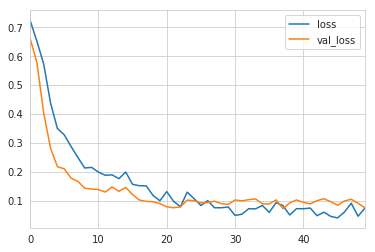

In [83]:
log[['loss', 'val_loss']].plot()

100/100 [==============================] - 0s 373us/sample - loss: 0.0759 - acc: 0.9800
Validation accuracy is 0.97


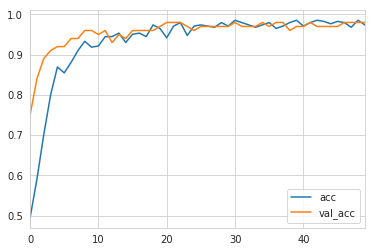

In [84]:
log[['acc', 'val_acc']].plot()
model.evaluate(x_test, y_test, batch_size=batch_size)
print('Validation accuracy is', result[1])

# k-fold cross validation

In [ ]:
model = build_model()
model.summary()

In [ ]:
k = 10
batch_size = 10
epochs = 20
kfold = RepeatedStratifiedKFold(n_splits=k, n_repeats=1, random_state=76)
count = 0
val_acc = list()
for train, test in kfold.split(x_dev, y_dev):
    x_train, y_train, x_test, y_test = x_dev[train], y_dev[train], x_dev[test], y_dev[test]
    # Normalise the data
    x_train_mean = x_train.mean()
    x_train_std = x_train.std()
    x_train = (x_train - x_train_mean)/(x_train_std) 
    x_test = (x_test - x_train_mean)/(x_train_std)
    # Build and train a model
    model = build_model()
    start = time.time()
    hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=1)
    end = time.time()
    log = pd.DataFrame(hist.history) 
    print('Training of fold', count, 'complete in', round(end-start), 'seconds')
    val_acc.append(log.iloc[-1]['val_acc'])
    count = count + 1
  
val_acc = pd.DataFrame(val_acc, columns=['val_acc'])
print(val_acc)

Train on 398 samples, validate on 46 samples
Epoch 1/20
398/398 [==============================] - 1s 3ms/sample - loss: -1.9739 - acc: 0.4874 - val_loss: -3.8493 - val_acc: 0.5000
Epoch 2/20
398/398 [==============================] - 0s 806us/sample - loss: -6.6980 - acc: 0.5000 - val_loss: -7.9712 - val_acc: 0.5000
Epoch 3/20
398/398 [==============================] - 0s 832us/sample - loss: -7.7329 - acc: 0.5000 - val_loss: -7.9712 - val_acc: 0.5000
Epoch 4/20
398/398 [==============================] - 0s 855us/sample - loss: -7.8882 - acc: 0.5000 - val_loss: -7.9712 - val_acc: 0.5000
Epoch 5/20
398/398 [==============================] - 0s 848us/sample - loss: -7.9393 - acc: 0.5000 - val_loss: -7.9712 - val_acc: 0.5000
Epoch 6/20
398/398 [==============================] - 0s 866us/sample - loss: -7.9082 - acc: 0.5000 - val_loss: -7.9712 - val_acc: 0.5000
Epoch 7/20
398/398 [==============================] - 0s 857us/sample - loss: -7.9513 - acc: 0.5000 - val_loss: -7.9712 - val_acc

400/400 [==============================] - 0s 872us/sample - loss: -7.9654 - acc: 0.5000 - val_loss: -7.9712 - val_acc: 0.5000
Epoch 19/20
400/400 [==============================] - 0s 862us/sample - loss: -7.9712 - acc: 0.5000 - val_loss: -7.9712 - val_acc: 0.5000
Epoch 20/20
400/400 [==============================] - 0s 870us/sample - loss: -7.9389 - acc: 0.4975 - val_loss: -7.9712 - val_acc: 0.5000
Training of fold 2 complete in 11 seconds
Train on 400 samples, validate on 44 samples
Epoch 1/20
400/400 [==============================] - 1s 3ms/sample - loss: 0.0865 - acc: 0.3750 - val_loss: -1.1744 - val_acc: 0.5000
Epoch 2/20
400/400 [==============================] - 0s 821us/sample - loss: -2.7871 - acc: 0.5000 - val_loss: -5.8894 - val_acc: 0.5000
Epoch 3/20
400/400 [==============================] - 0s 882us/sample - loss: -6.7576 - acc: 0.5000 - val_loss: -7.9712 - val_acc: 0.5000
Epoch 4/20
400/400 [==============================] - 0s 871us/sample - loss: -7.6992 - acc: 0.50

400/400 [==============================] - 0s 898us/sample - loss: -7.9246 - acc: 0.5000 - val_loss: -7.9712 - val_acc: 0.5000
Epoch 16/20
400/400 [==============================] - 0s 955us/sample - loss: -7.9712 - acc: 0.5000 - val_loss: -7.9712 - val_acc: 0.5000
Epoch 17/20
400/400 [==============================] - 0s 880us/sample - loss: -7.9517 - acc: 0.5000 - val_loss: -7.9712 - val_acc: 0.5000
Epoch 18/20
400/400 [==============================] - 0s 889us/sample - loss: -7.8774 - acc: 0.5000 - val_loss: -7.9712 - val_acc: 0.5000
Epoch 19/20
400/400 [==============================] - 0s 872us/sample - loss: -7.9712 - acc: 0.5000 - val_loss: -7.9712 - val_acc: 0.5000
Epoch 20/20
400/400 [==============================] - 0s 873us/sample - loss: -7.8584 - acc: 0.5000 - val_loss: -7.9712 - val_acc: 0.5000
Training of fold 5 complete in 12 seconds
Train on 400 samples, validate on 44 samples
Epoch 1/20
400/400 [==============================] - 1s 3ms/sample - loss: 0.4904 - acc: 0

Validation accuracy mean and sample standard deviation val_acc    0.5
dtype: float64 val_acc    0.0
dtype: float64


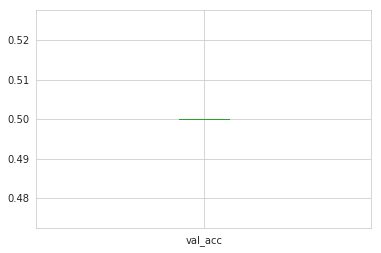

In [99]:
val_acc.boxplot(column=['val_acc'])
print('Validation accuracy mean and sample standard deviation', val_acc.mean(), val_acc.std())